In [7]:
from  sqlalchemy import  *
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.orm import scoped_session, sessionmaker
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt

In [8]:
engine = create_engine('sqlite:///BEER.sqlite.db')

Base = automap_base()
Base.prepare(engine, reflect = True)

In [9]:
conn = engine.connect()
df = pd.read_sql('SELECT * FROM annual_production;',conn)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
index                           122 non-null int64
Year                            122 non-null float64
Barrels (31 gallons) (2)        122 non-null object
Number of Breweries (1)         122 non-null object
Total Barrels (3)               122 non-null object
Taxable Removals (4)            122 non-null object
Total Shipped (Exported) (6)    122 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 6.8+ KB


In [11]:
df.head()

,index,Year,Barrels (31 gallons) (2),Number of Breweries (1),Total Barrels (3),Taxable Removals (4),Total Shipped (Exported) (6)
0,0,2007.0,"6,000,001 Barrels and Over",17,"167,562,085.40","153,687,098.69","2,410,884.99"
1,1,2007.0,"1,000,001 to 6,000,000 Barrels (5)",3,"13,003,841.85","12,705,937.93","1,110,458.58"
2,2,2007.0,"500,001 to 1,000,000 Barrels",10,"6,641,984.43","6,361,689.70","107,036.38"
3,3,2007.0,"100,001 to 500,000 Barrels",24,"4,972,430.67","3,920,412.25","133,170.81"
4,4,2007.0,"60,001 to 100,000 Barrels",20,"1,513,844.02","1,229,995.99","2,777.13"


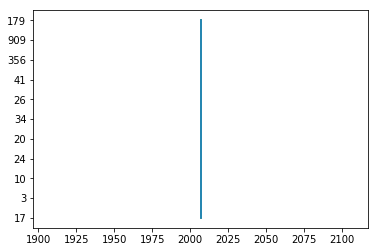

In [18]:
x = df[df.Year == 2007.0].Year
y = df[df.Year ==2007.0]['Number of Breweries (1)']
for barrel in df[df.Year ==2007.0]['Total Barrels (3)']:
    plt.plot(x,y) 
